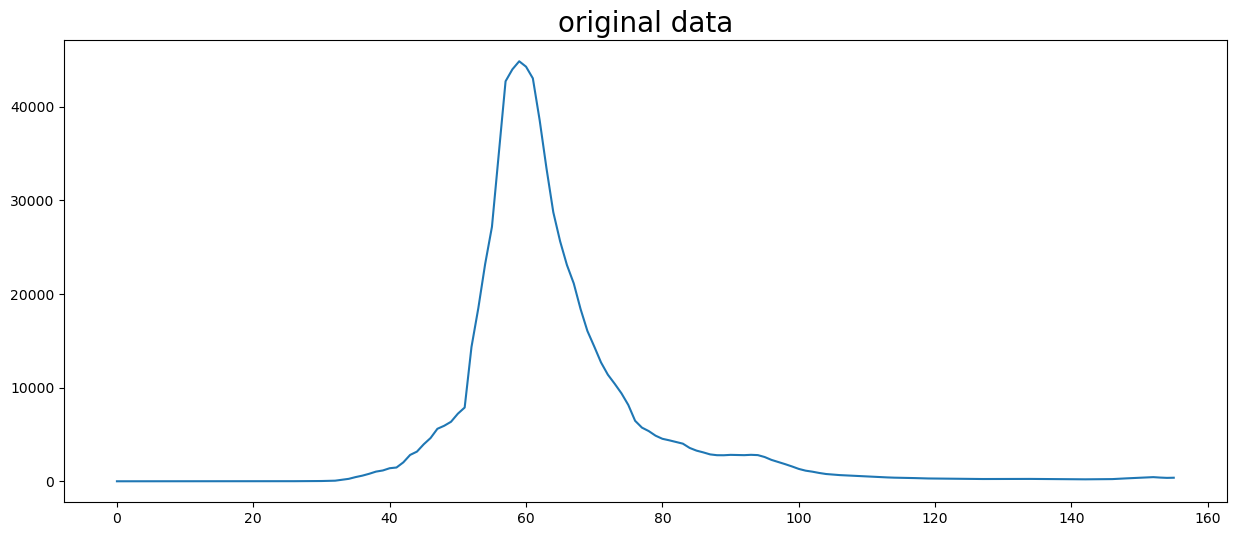

In [1]:
# ARIMA model for newly death people prediction
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import itertools
import warnings
import csv


import seaborn as sns
from  statsmodels.tsa.arima_model  import  ARIMA
import statsmodels as sm
from scipy import stats 

from statsmodels.tsa.stattools import adfuller

df = pd.read_excel('hk5thProcessed.xlsx')
x = df['day'][:]
y = df['avgInfected'][:]
plt.figure(figsize=(15,6))
plt.title("original data",loc="center",fontsize=20)
plt.plot(y)


In [3]:
df["diff_1"] = df["avgInfected"].diff(1)  #一阶差分
df["diff_2"] = df["avgInfected"].diff(2)  #二阶差分
 
#未差分平稳性检测（ADF检验、单位根检验）
from  statsmodels.tsa.stattools  import  adfuller  as  ADF
print(u'原始序列的ADF检验结果为：',  ADF(df["avgInfected"]))
#返回值依次为adf、pvalue、usedlag、nobs、critical  values、icbest、regresults、resstore  p<0.05时表示稳定

# p-value :0.0057 , >0.05

#一阶差分平稳性检测（ADF检验、单位根检验）
print(u'一阶差分序列的ADF检验结果为：',  ADF(df["diff_1"][1:]))
#返回值依次为adf、pvalue、usedlag、nobs、critical  values、icbest、regresults、resstore  p<0.05时表示稳定
# 一阶差分后，p value < 0.05，ARIMA中的参数d定为1
print(u'二阶差分序列的ADF检验结果为：',  ADF(df["diff_2"][2:]))

原始序列的ADF检验结果为： (-1.813834497353458, 0.37361520246605207, 14, 141, {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}, 2263.9329620579924)
一阶差分序列的ADF检验结果为： (-3.654474914795815, 0.0048010330526717, 13, 141, {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}, 2250.737230525861)
二阶差分序列的ADF检验结果为： (-2.6100064099711466, 0.09094673176226448, 14, 139, {'1%': -3.4782936965183815, '5%': -2.882567574015525, '10%': -2.5779830117488745}, 2250.8753398847216)


In [26]:
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df['avgInfected'],lags = 1)

# p<0.05 not white noise

,lb_stat,lb_pvalue
1,155.144626,1.301933e-35


In [27]:
acorr_ljungbox(df['diff_1'][1:],lags = 1)

# p<0.05 not white noise

,lb_stat,lb_pvalue
1,108.301963,2.307959e-25


In [36]:
#信息准则定阶：AIC、BIC、HQIC
import statsmodels.api as sm
def get_pq(data):
    #AIC
    AIC = sm.tsa.arma_order_select_ic(data, max_ar=2, max_ma=2, ic='aic')['aic_min_order']
    #BIC
    BIC = sm.tsa.arma_order_select_ic(data, max_ar=2, max_ma=2, ic='bic')['bic_min_order']
    print('the AIC is{},\nthe BIC is{}\n'.format(AIC,BIC))
get_pq(df['diff_1'][1:156])


H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:

the AIC is(6, 4),
the BIC is(2, 4)



H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
import statsmodels.api as sm
arima8110 = sm.tsa.ARIMA(df["avgInfected"][:122],order=(2,1,4)).fit()
arima8110.summary()

result = arima8110.forecast(35)
result.to_csv('hk_arima_confirm_result.csv')
result = pd.read_csv('hk_arima_confirm_result.csv')
result.columns = ['day','pred']

H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [18]:
result

,day,pred
0,122,166.734218
1,123,51.190593
2,124,69.923806
3,125,-12.780498
4,126,-106.273006
5,127,-175.769603
6,128,-216.275268
7,129,-234.656101
8,130,-239.872236
9,131,-238.953417


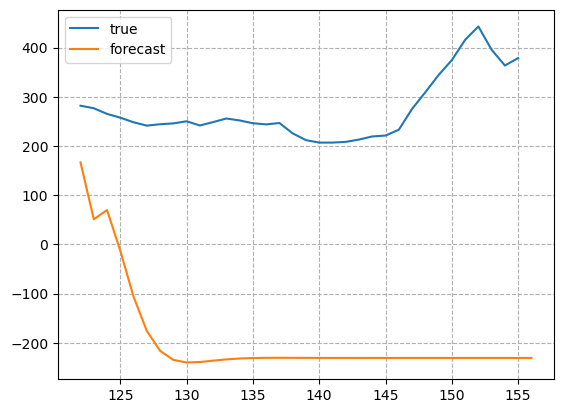

In [6]:
plt.plot(df['avgInfected'][122:156],label = 'true')
plt.plot(arima8110.forecast(35),label = 'forecast')
plt.legend()
plt.grid(linestyle = '--')

In [20]:
#回归评价指标

from sklearn import metrics


MSE = metrics.mean_squared_error( df['avgInfected'][121:156], result['pred'])

RMSE = metrics.mean_squared_error( df['avgInfected'][121:156],result['pred'] )**0.5

MAE = metrics.mean_absolute_error( df['avgInfected'][121:156], result['pred'])

MAPE = metrics.mean_absolute_percentage_error( df['avgInfected'][121:156],result['pred'])

print(MSE,',',RMSE,',',MAE,',',MAPE)

230255.82881272442 , 479.84979817930986 , 465.51739121446496 , 1.7389557070352488
